# Project: Investigating the TMDB movie dataset!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **The Movie Dataset** In this notebook we're about to explore a dataset given to us by kaggle and further cleaned by udacity to suit an trainee level data analyst. We shall use pandas and numpy packages for calculations and dataframe manipulations also, using seaborn and matplotlib for data visualizations. This humble project is going to help us in determining which factors makes a movie good or bad!

### Asked questions to be answered later in the conclusion
> 1) Which genres had the largest release of movies (or the most popular genre)?
>
> 2) Which year has the highest release of movies?

In [738]:
import pandas as pd
import numpy as np
import seaborn as ss
import matplotlib.pyplot as plt
%matplotlib inline 



In [739]:
def make_histogram(df):
    df.hist(figsize= (20,20));
    

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [740]:
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


##### This cell gives us an overview of the dataset we are working with^

In [741]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### The describe function shows us alot of useful information that helps with speeding up the process! ^

In [742]:
df.shape

(10866, 21)

##### The shape function tells us how big is the dataset with rows being the first element followed by the columns ^

In [743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#####  Info gives us helpful information including columns that contains null or not assigned values that should be further investigated .^

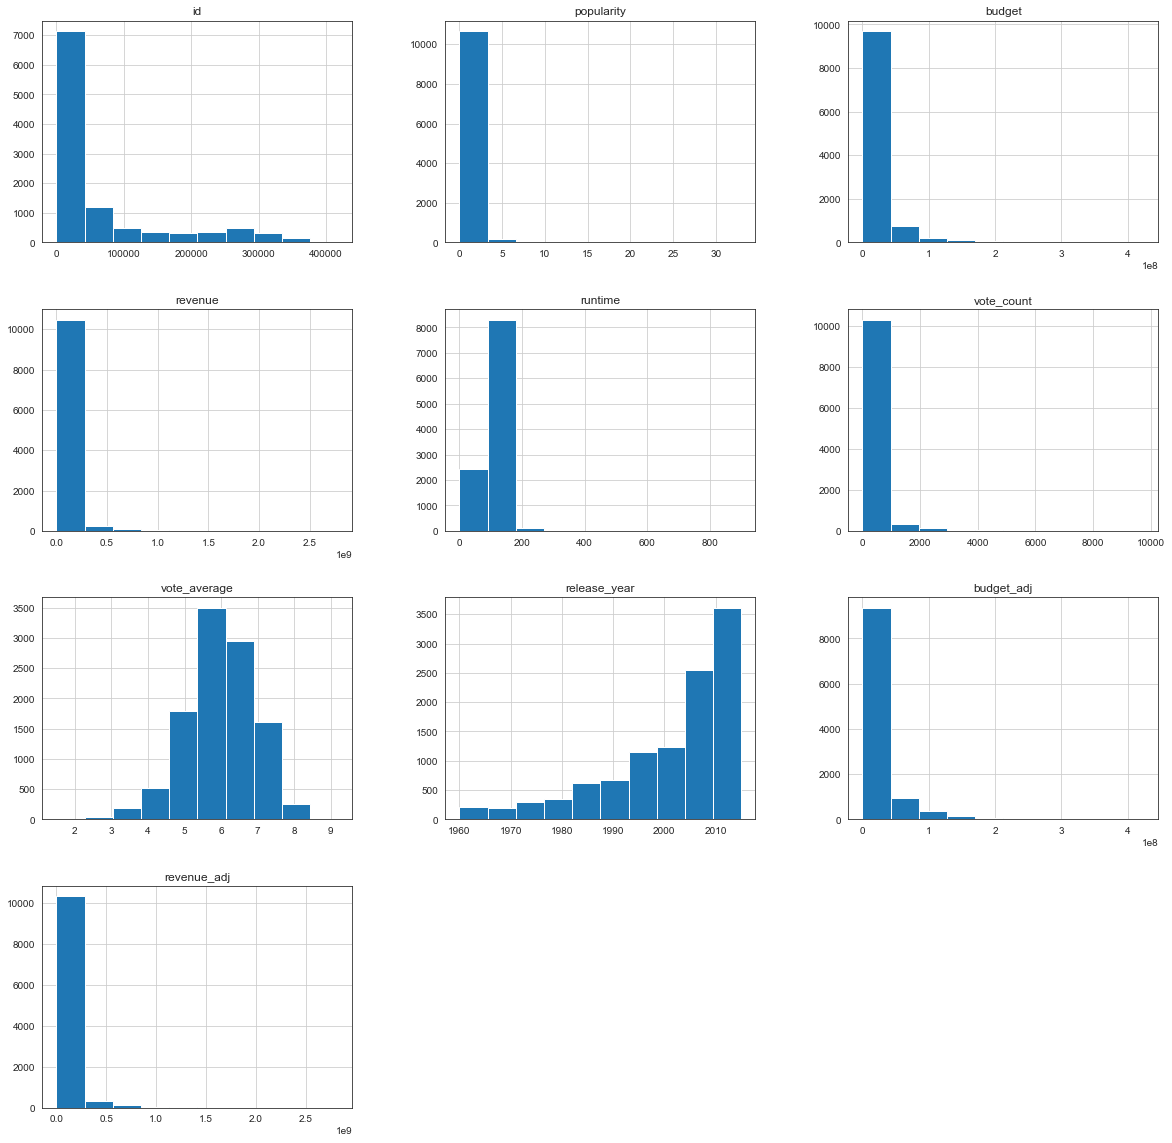

In [744]:
make_histogram(df)

## Data Cleaning!

#### As you see from the df.head cell we have alot of columns that's not going to be used in our analysis so, we'd better remove them for a cleaner and easier data analysis. Also, to save space and time .

In [745]:
# removing unneeded columns from our dataset
df.drop(['imdb_id','homepage','revenue','tagline','keywords','production_companies'],axis=1,inplace=True)

# removing repetitive columns
df.drop(['budget'],axis=1,inplace=True)

#checking again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   original_title  10866 non-null  object 
 3   cast            10790 non-null  object 
 4   director        10822 non-null  object 
 5   overview        10862 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [746]:
df[df.cast.isnull()]

,id,popularity,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,Sanjay's Super Team,NaN,Sanjay Patel,Sanjay's Super Team follows the daydream of a ...,7,Animation,11/25/2015,47,6.9,2015,0.000000,0.0
441,355020,0.220751,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,A documentary on the unrest in Ukraine during ...,98,Documentary,10/9/2015,37,8.2,2015,0.000000,0.0
465,321109,0.201696,Bitter Lake,NaN,Adam Curtis,An experimental documentary that explores Saud...,135,Documentary,1/24/2015,19,7.8,2015,0.000000,0.0
536,333350,0.122543,A Faster Horse,NaN,David Gelb,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,10/8/2015,12,8.0,2015,0.000000,0.0
538,224972,0.114264,The Mask You Live In,NaN,Jennifer Siebel Newsom,"Compared to girls, research shows that boys in...",88,Documentary,1/1/2015,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,0.253376,Red's Dream,NaN,John Lasseter,Life as the sole sale item in the clearance co...,4,Animation,8/17/1987,44,6.6,1987,0.000000,0.0
9755,48714,0.046272,The Big Shave,NaN,Martin Scorsese,This short film is a metaphor for the Vietnam ...,6,Drama,1/1/1968,12,6.7,1968,0.000000,0.0
10434,48784,0.146906,Six Men Getting Sick,NaN,David Lynch,Lynch's first film project consists of a loop ...,4,Animation,1/1/1967,16,5.2,1967,1307.352748,0.0
10550,13925,0.306425,Luxo Jr.,NaN,John Lasseter,A baby lamp finds a ball to play with and it's...,2,Animation|Family,8/17/1986,81,7.3,1986,0.000000,0.0


##### Looks like we have alot of the cast values missing so to not interfere with the whole dataset we should drop the cast column as it won't be necessary for our exploration

In [747]:
df.drop(['cast'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   original_title  10866 non-null  object 
 3   director        10822 non-null  object 
 4   overview        10862 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget_adj      10866 non-null  float64
 12  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


#####  Next step is to drop all null values in director, overview and  genres as tey are not much and won't make a significant difference. 

In [748]:
df.dropna(inplace=True)

In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10799 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10799 non-null  int64  
 1   popularity      10799 non-null  float64
 2   original_title  10799 non-null  object 
 3   director        10799 non-null  object 
 4   overview        10799 non-null  object 
 5   runtime         10799 non-null  int64  
 6   genres          10799 non-null  object 
 7   release_date    10799 non-null  object 
 8   vote_count      10799 non-null  int64  
 9   vote_average    10799 non-null  float64
 10  release_year    10799 non-null  int64  
 11  budget_adj      10799 non-null  float64
 12  revenue_adj     10799 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


In [750]:
# honestly I copied parts of this line as it is completely theoretical programming knowledge that I didn't know
df_genres = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_genres.head(10)

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
5,Western,Drama,Adventure,Thriller,None
6,Science Fiction,Action,Thriller,Adventure,None
7,Drama,Adventure,Science Fiction,None,None
8,Family,Animation,Adventure,Comedy,None
9,Comedy,Animation,Family,None,None


In [751]:
# We should remove genres_4 and genres_5 as they appear to be null for most of the movies 
df_genres.drop(['genres_5', 'genres_4'], axis=1, inplace=True)

In [752]:
#checking
df_genres.head(30)

,genres_1,genres_2,genres_3
0,Action,Adventure,Science Fiction
1,Action,Adventure,Science Fiction
2,Adventure,Science Fiction,Thriller
3,Action,Adventure,Science Fiction
4,Action,Crime,Thriller
5,Western,Drama,Adventure
6,Science Fiction,Action,Thriller
7,Drama,Adventure,Science Fiction
8,Family,Animation,Adventure
9,Comedy,Animation,Family


In [753]:
#Now we join the datasets and drop the original genres column
df= df.join([df_genres])
df.drop(['genres'], axis=1, inplace=True)

In [754]:
df.head()

,id,popularity,original_title,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3
0,135397,32.985763,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Action,Adventure,Science Fiction
1,76341,28.419936,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Action,Adventure,Science Fiction
2,262500,13.112507,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,Adventure,Science Fiction,Thriller
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,Action,Adventure,Science Fiction
4,168259,9.335014,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,Action,Crime,Thriller


In [755]:
#checking for any duplicates that may affect the results.
df.duplicated().sum()

1

In [756]:
#removing the duplicates we found then checking for them again
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [757]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,1.079800e+04,1.079800e+04
mean,65574.970828,0.649532,102.199389,218.638452,5.971069,2001.287738,1.765764e+07,5.168671e+07
std,91764.340405,1.002518,30.771003,577.211855,0.932983,12.820051,3.438638e+07,1.450299e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10569.500000,0.209176,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20454.000000,0.385512,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74704.500000,0.717566,111.750000,147.000000,6.600000,2011.000000,2.103337e+07,3.409274e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#####  I can see that the budget , revenue_adj and budget_adj columns have zero values that I beleive would interfere with the accuracy of our results so we should fill them with the mean!

In [758]:
df['runtime']=df['runtime'].replace(0,df['runtime'].mean())
df['budget_adj']=df['budget_adj'].replace(0,df['budget_adj'].mean())
df['revenue_adj']=df['revenue_adj'].replace(0,df['revenue_adj'].mean())
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,1.079800e+04,1.079800e+04
mean,65574.970828,0.649532,102.454935,218.638452,5.971069,2001.287738,2.687075e+07,8.016753e+07
std,91764.340405,1.002518,30.342549,577.211855,0.932983,12.820051,3.057510e+07,1.369315e+08
min,5.000000,0.000188,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10569.500000,0.209176,90.000000,17.000000,5.400000,1995.000000,1.765764e+07,5.168671e+07
50%,20454.000000,0.385512,99.000000,39.000000,6.000000,2006.000000,1.765764e+07,5.168671e+07
75%,74704.500000,0.717566,111.750000,147.000000,6.600000,2011.000000,2.103337e+07,5.168671e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#####  Let's also change the data type of the release_date and release_year columns as we might need them in the dataset exploration later on!

In [759]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_year'].astype(int)
df.dtypes

id                         int64
popularity               float64
original_title            object
director                  object
overview                  object
runtime                  float64
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int32
budget_adj               float64
revenue_adj              float64
genres_1                  object
genres_2                  object
genres_3                  object
dtype: object

In [760]:
df.head()

,id,popularity,original_title,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3
0,135397,32.985763,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,Action,Adventure,Science Fiction
1,76341,28.419936,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120.0,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,Action,Adventure,Science Fiction
2,262500,13.112507,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,Adventure,Science Fiction,Thriller
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,Action,Adventure,Science Fiction
4,168259,9.335014,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,Action,Crime,Thriller


In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10798 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10798 non-null  int64         
 1   popularity      10798 non-null  float64       
 2   original_title  10798 non-null  object        
 3   director        10798 non-null  object        
 4   overview        10798 non-null  object        
 5   runtime         10798 non-null  float64       
 6   release_date    10798 non-null  datetime64[ns]
 7   vote_count      10798 non-null  int64         
 8   vote_average    10798 non-null  float64       
 9   release_year    10798 non-null  int32         
 10  budget_adj      10798 non-null  float64       
 11  revenue_adj     10798 non-null  float64       
 12  genres_1        10798 non-null  object        
 13  genres_2        8488 non-null   object        
 14  genres_3        5062 non-null   object        
dtypes:

#####  We have one last problem wich is the null values in genres 2 and 3

In [762]:
df["genres_2"].fillna("No 2nd genre", inplace = True)
df["genres_3"].fillna("No 3nd genre", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10798 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10798 non-null  int64         
 1   popularity      10798 non-null  float64       
 2   original_title  10798 non-null  object        
 3   director        10798 non-null  object        
 4   overview        10798 non-null  object        
 5   runtime         10798 non-null  float64       
 6   release_date    10798 non-null  datetime64[ns]
 7   vote_count      10798 non-null  int64         
 8   vote_average    10798 non-null  float64       
 9   release_year    10798 non-null  int32         
 10  budget_adj      10798 non-null  float64       
 11  revenue_adj     10798 non-null  float64       
 12  genres_1        10798 non-null  object        
 13  genres_2        10798 non-null  object        
 14  genres_3        10798 non-null  object        
dtypes:

#####  Now do the same in df_genres 

In [763]:
df_genres["genres_2"].fillna("No 2nd genre", inplace = True)
df_genres["genres_3"].fillna("No 3nd genre", inplace = True)
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10799 entries, 0 to 10865
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres_1  10799 non-null  object
 1   genres_2  10799 non-null  object
 2   genres_3  10799 non-null  object
dtypes: object(3)
memory usage: 595.5+ KB


### As we can see now our dataset is completely cleaned as all duplicates are removed, unneeded columns are also removed , no null or zero values , genres values where separated into several columns . In conclusion we could start our exploration now!!!

<a id='eda'></a>
## Exploratory Data Analysis



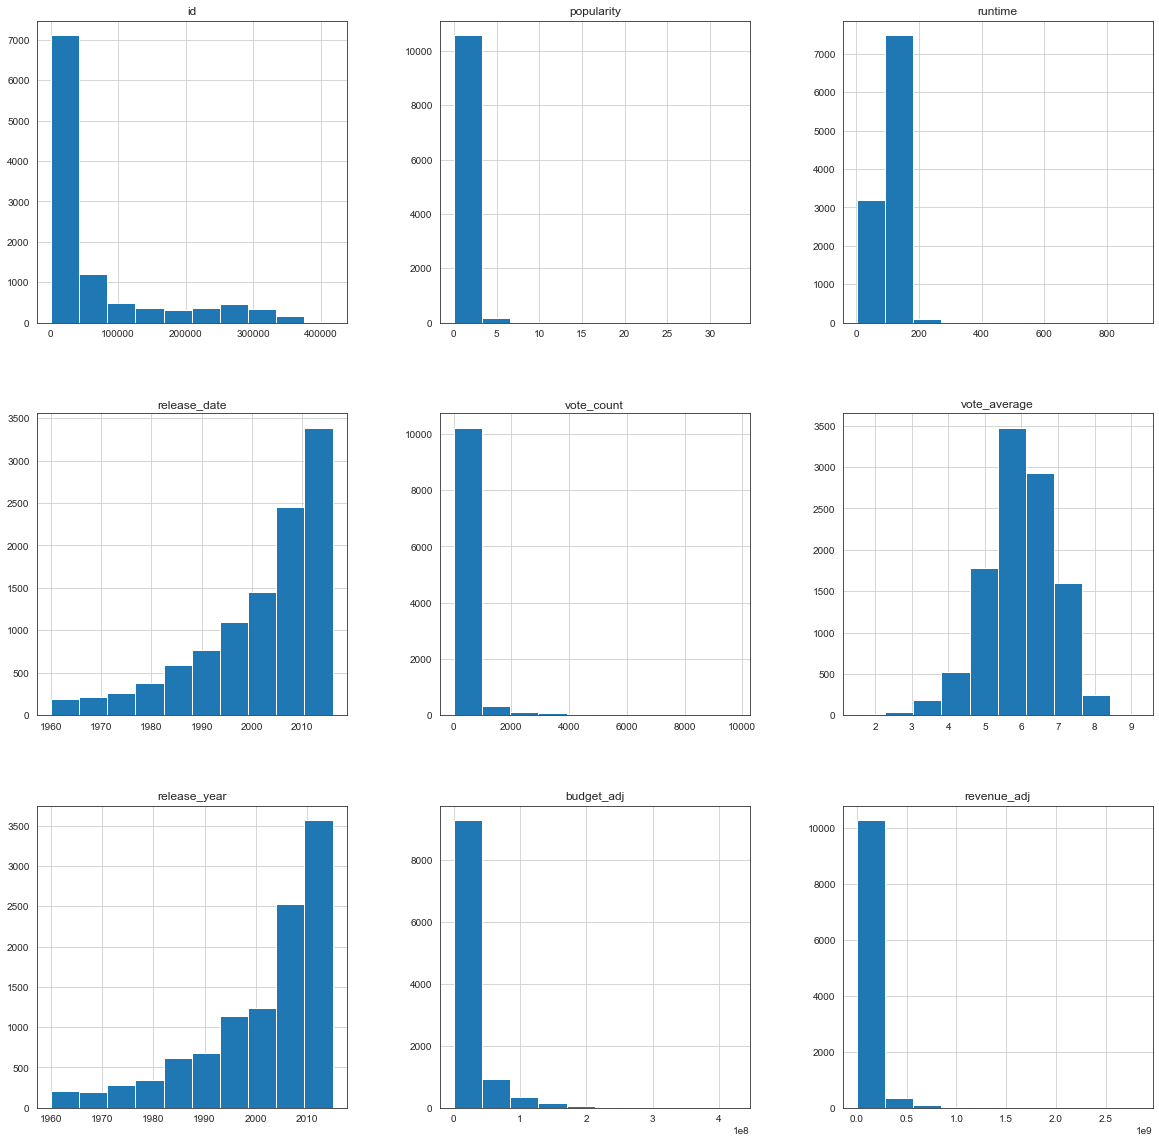

In [764]:
# Histograms for all the data
make_histogram(df)

### Which genres had the largest release of movies (or the most popular genre)?

> We will join genres and release date in a seperate dataframe to ease the exploratory process for the asked question in this section

>> We already have a data frame for all genres called df_genres so we'll add the release year only. 

In [765]:
df_date_genre= df_genres.join(df['release_year'])
df_date_genre.head(10)

,genres_1,genres_2,genres_3,release_year
0,Action,Adventure,Science Fiction,2015.0
1,Action,Adventure,Science Fiction,2015.0
2,Adventure,Science Fiction,Thriller,2015.0
3,Action,Adventure,Science Fiction,2015.0
4,Action,Crime,Thriller,2015.0
5,Western,Drama,Adventure,2015.0
6,Science Fiction,Action,Thriller,2015.0
7,Drama,Adventure,Science Fiction,2015.0
8,Family,Animation,Adventure,2015.0
9,Comedy,Animation,Family,2015.0


In [766]:
# Set of unique release years
release_year_list = sorted(set(df['release_year']))
release_year_list

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [767]:
# Set of unique genres for each genre column then add them
genres1_list = sorted(set(df_genres['genres_1']))
genres2_list = sorted(set(df_genres['genres_2']))
genres3_list = sorted(set(df_genres['genres_3']))
genres_all_list = genres1_list + genres2_list + genres3_list
genres_all_list

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'No 2nd genre',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'No 3nd genre',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

#####  Now we have duplicates in the list so we must delete them for better and more accurate results!

In [768]:
genres_all_list = list(set(genres_all_list))
genres_all_list

['Western',
 'History',
 'TV Movie',
 'Documentary',
 'Animation',
 'Romance',
 'Comedy',
 'Adventure',
 'Science Fiction',
 'Music',
 'War',
 'Horror',
 'Fantasy',
 'Drama',
 'Foreign',
 'Thriller',
 'Crime',
 'Action',
 'Family',
 'No 2nd genre',
 'Mystery',
 'No 3nd genre']

In [769]:
len(genres_all_list)

22

#####  We conclude that we have 22 movie genres

##### Now count the numbers of appearance of each genre in the dataframe

In [770]:
# I found this amazing counting function on stack overflow!
df_genres_counts = df_genres.apply(pd.Series.value_counts)
df_genres_counts 

,genres_1,genres_2,genres_3
Action,1587.0,541.0,199.0
Adventure,586.0,623.0,181.0
Animation,398.0,206.0,79.0
Comedy,2312.0,987.0,386.0
Crime,381.0,449.0,350.0
Documentary,424.0,75.0,8.0
Drama,2447.0,1619.0,546.0
Family,142.0,445.0,399.0
Fantasy,272.0,302.0,189.0
Foreign,9.0,62.0,68.0


In [771]:
df_genres_counts["genres_1"].fillna("0", inplace = True)
df_genres_counts["genres_2"].fillna("0", inplace = True)
df_genres_counts["genres_3"].fillna("0", inplace = True)
df_genres_counts

,genres_1,genres_2,genres_3
Action,1587.0,541.0,199.0
Adventure,586.0,623.0,181.0
Animation,398.0,206.0,79.0
Comedy,2312.0,987.0,386.0
Crime,381.0,449.0,350.0
Documentary,424.0,75.0,8.0
Drama,2447.0,1619.0,546.0
Family,142.0,445.0,399.0
Fantasy,272.0,302.0,189.0
Foreign,9.0,62.0,68.0


In [772]:
# We filled the null values with zeros but I think we should completely remove the rows!
df_genres_counts.drop(['No 3nd genre','No 2nd genre'],axis=0, inplace=True)


In [773]:
df_genres_counts

,genres_1,genres_2,genres_3
Action,1587.0,541.0,199.0
Adventure,586.0,623.0,181.0
Animation,398.0,206.0,79.0
Comedy,2312.0,987.0,386.0
Crime,381.0,449.0,350.0
Documentary,424.0,75.0,8.0
Drama,2447.0,1619.0,546.0
Family,142.0,445.0,399.0
Fantasy,272.0,302.0,189.0
Foreign,9.0,62.0,68.0


In [774]:
# now sum the occurence of each genre
df_genres_counts["sum"] = df_genres_counts.sum(axis=1)
df_genres_counts

,genres_1,genres_2,genres_3,sum
Action,1587.0,541.0,199.0,2327.0
Adventure,586.0,623.0,181.0,1390.0
Animation,398.0,206.0,79.0,683.0
Comedy,2312.0,987.0,386.0,3685.0
Crime,381.0,449.0,350.0,1180.0
Documentary,424.0,75.0,8.0,507.0
Drama,2447.0,1619.0,546.0,4612.0
Family,142.0,445.0,399.0,986.0
Fantasy,272.0,302.0,189.0,763.0
Foreign,9.0,62.0,68.0,139.0


In [775]:
# Now isolate the sum column in a separate dataframe for easiear handling
df_genres_counts.drop(['genres_1','genres_2','genres_3'],axis=1, inplace=True)

In [776]:
df_genres_counts

,sum
Action,2327.0
Adventure,1390.0
Animation,683.0
Comedy,3685.0
Crime,1180.0
Documentary,507.0
Drama,4612.0
Family,986.0
Fantasy,763.0
Foreign,139.0


In [777]:
# A line plot visualizing the number of movies for each genre
df_genres_counts.plot( y='sum', kind='line', figsize=(550,100),fontsize=350)
plt.title('Most Released Genre',fontsize=700)
plt.xlabel('Number of Movies', fontsize=400)
plt.ylabel('genre',fontsize=400)
ss.set_style('white')

##### Not really clear line so we will use a barplot instead!

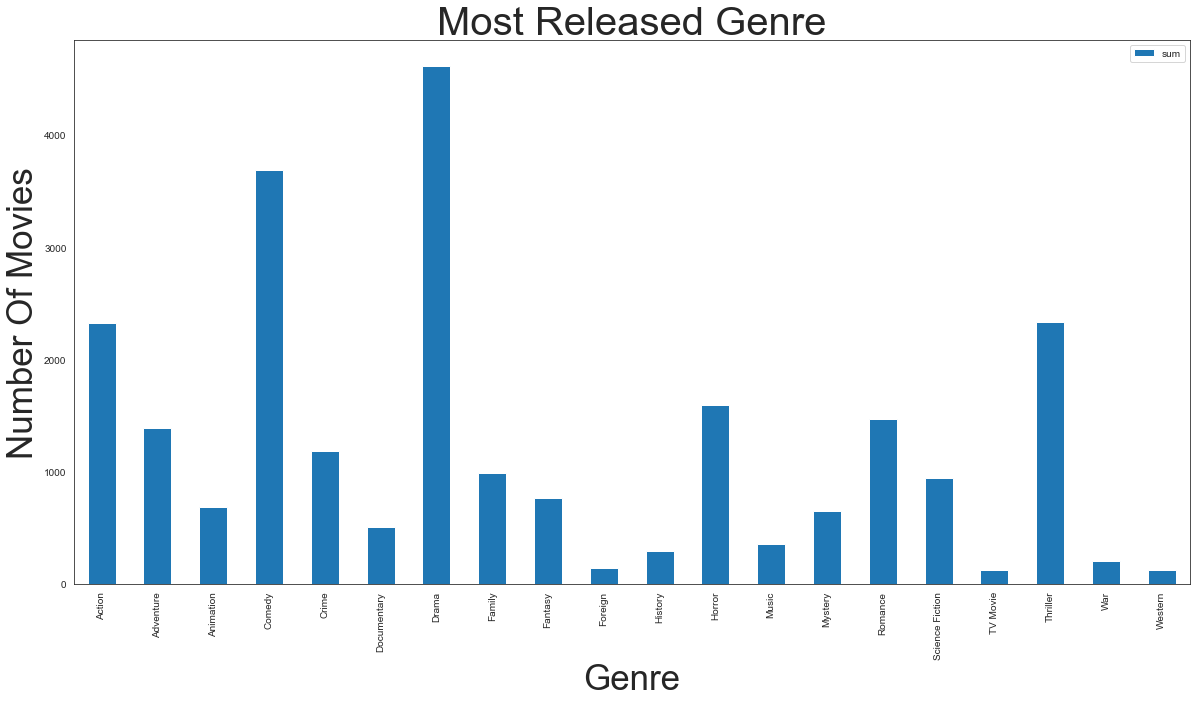

In [778]:
# A bar plot visualizing the number of movies for each genre
df_genres_counts.plot(kind= 'bar',figsize = (20,10))
plt.title('Most Released Genre',fontsize=40)
plt.ylabel('Number Of Movies',fontsize=35)
plt.xlabel('Genre',fontsize=35);

#####  The most popular movie genre is Drama followed by comedy then thriller and action nearly in the same position!

## Which year has the highest release of movies?

In [779]:
df.head()

,id,popularity,original_title,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3
0,135397,32.985763,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,Action,Adventure,Science Fiction
1,76341,28.419936,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120.0,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,Action,Adventure,Science Fiction
2,262500,13.112507,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,Adventure,Science Fiction,Thriller
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,Action,Adventure,Science Fiction
4,168259,9.335014,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,Action,Crime,Thriller


In [780]:
#Number of movies in each year 
df_release=df.groupby('release_year').count()['id']

In [781]:
df_release.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

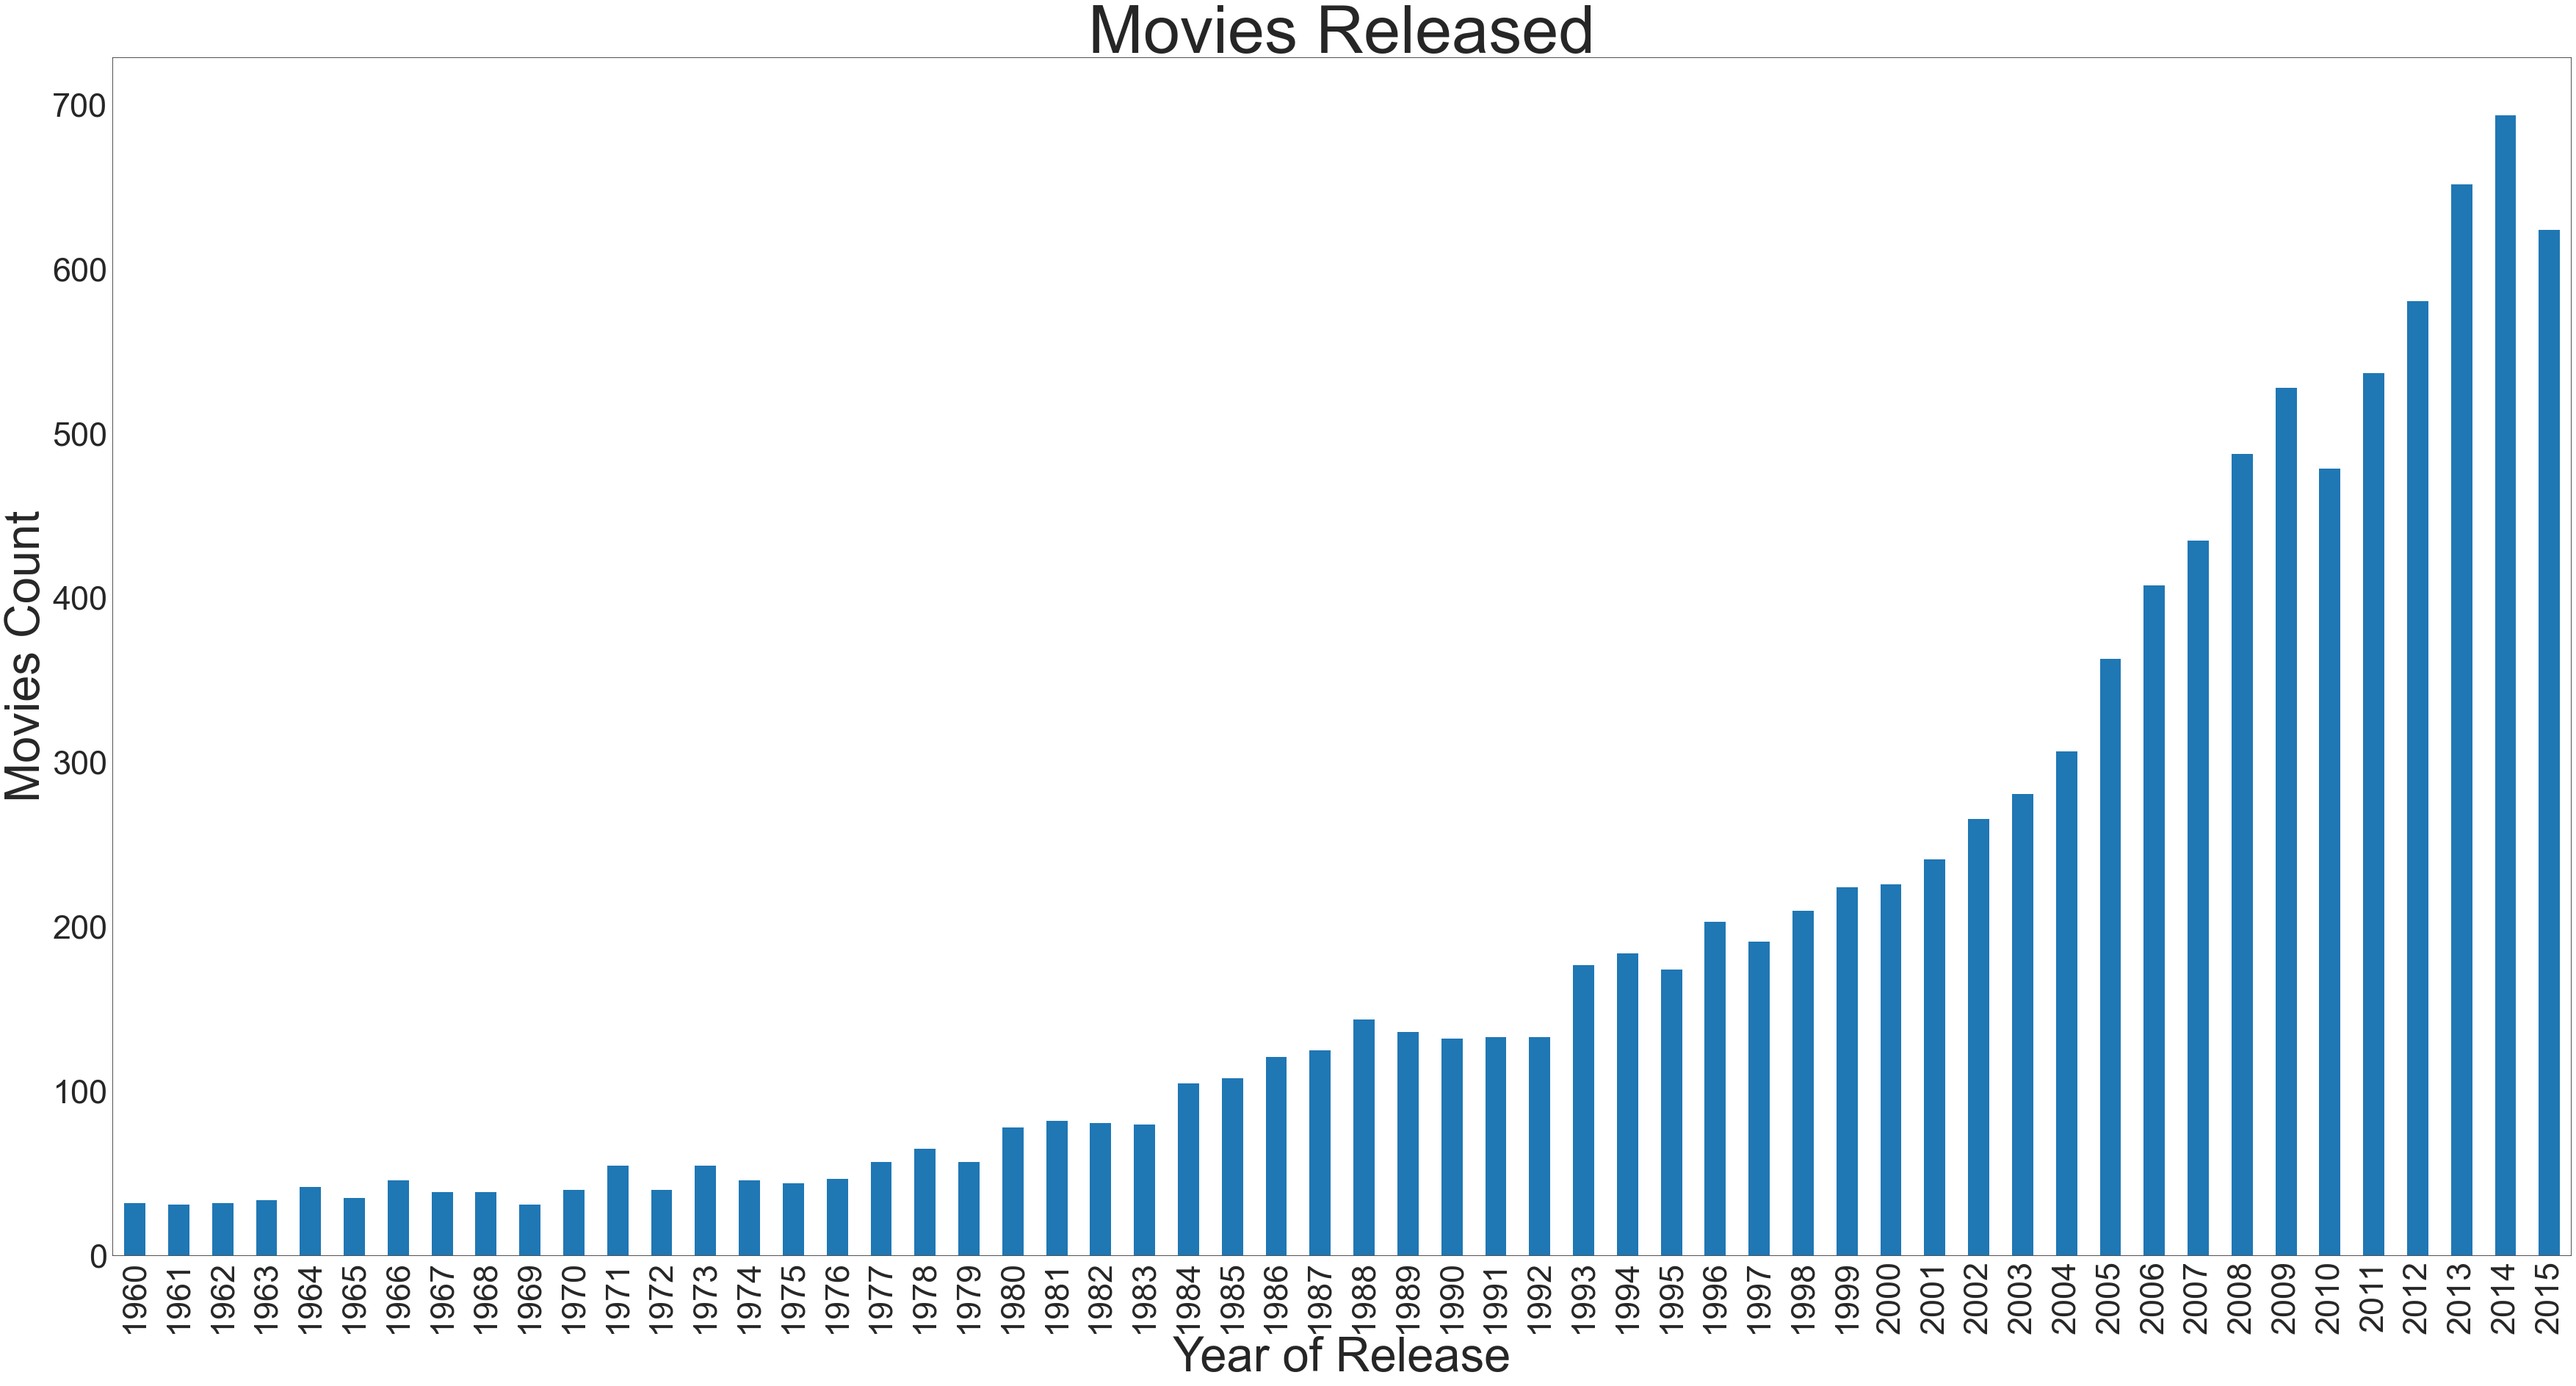

In [782]:
# Now we visualize the data
df_release.plot(kind= 'bar',figsize = (60,30),fontsize=45)
plt.title('Movies Released',fontsize = 90)
plt.xlabel('Year of Release',fontsize = 65)
plt.ylabel('Movies Count',fontsize = 65)
ss.set_style("darkgrid")

#####  We can see now that the highest number of movies are released in 2014 followed by 2013 then 2015.

<a id='conclusions'></a>
## Conclusions

> From the limited dataset I have been analysing we can see that :
>  1) The most popular movie genre is Drama followed by comedy!

>  2) Western, War and Foreign have the least made movies and are the least popular genre!

>  3) The highest release of movies is in 2014 followed by 2013.

>  4) We can notice a gradual increase and saturation in movie release year after year.

>  5) The year with the least movies released is 1961 and 1969.


>> **Limitations**

(This analysis is only based on this small dataset and is not a reliable source)

(No advanced statistics were performed)

(Take into consideration the removed null or unidentified values)